In [155]:
# importamos las librerias necesarias
import pandas as pd
import faker as fk
import random as rd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import openpyxl
import sympy as sp

In [156]:
planetas = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

In [157]:
# Para el apartado A
L1 = 1.00
t1 = 0.46
g_a = 2*L1 / (t1**2)
print("La aceleración de la gravedad es: ", g_a)

La aceleración de la gravedad es:  9.45179584120983


In [158]:
# Para el apartado B
L2 = 2.00
t2 = 0.66
g_b = 2*L2 / (t2**2)
print("La aceleración de la gravedad es: ", g_b)

La aceleración de la gravedad es:  9.182736455463727


In [159]:
# creamos un dataframe con los datos
df = pd.DataFrame({
    'Longitud': [L1, L2],
    'Tiempo': [t1, t2],
    'Gravedad': [g_a, g_b],
    'Planeta más cercano': ['Tierra', 'Saturno'],
    '2ndo más cercano': ['Saturno', 'Tierra']},index= ['Escenario A', 'Escenario B'])
df

,Longitud,Tiempo,Gravedad,Planeta más cercano,2ndo más cercano
Escenario A,1.0,0.46,9.451796,Tierra,Saturno
Escenario B,2.0,0.66,9.182736,Saturno,Tierra


In [160]:
def calcular_error(L, t):
    L_simbolo, t_simbolo = sp.symbols('L t')
    g_calculada_simbolo = (2*L_simbolo) / (t_simbolo**2)
    
    derivada_parcial_L = sp.diff(g_calculada_simbolo, L_simbolo)
    derivada_parcial_t = sp.diff(g_calculada_simbolo, t_simbolo)
    
    error_L = 0.01
    error_t = 0.01
    
    error_g_calculada = sp.sqrt((derivada_parcial_L * error_L)**2 + (derivada_parcial_t * error_t)**2)
    
    return float(error_g_calculada.subs({L_simbolo: L, t_simbolo: t}))


In [161]:
fake = fk.Faker()

def generar_datos(planetas):
    L = round(rd.uniform(0.7, 2.5), 2)
    t = round(rd.uniform(0.3, 0.8), 2)
    g_calculada = round((2*L) / (t**2), 2)
    
    diferencia_minima = float('inf')
    planeta_mas_cercano = ''
    
    for planeta, gravedad in planetas.items():
        diferencia = abs(gravedad - g_calculada)
        if diferencia < diferencia_minima:
            diferencia_minima = diferencia
            planeta_mas_cercano = planeta
    
    diferencia_minima_2 = float('inf')
    segundo_planeta_mas_cercano = ''
        
    for planeta, gravedad in planetas.items():
        if planeta != planeta_mas_cercano:
            diferencia = abs(gravedad - g_calculada)
            if diferencia < diferencia_minima_2:
                diferencia_minima_2 = diferencia
                segundo_planeta_mas_cercano = planeta

    error_g_calculada = calcular_error(L, t)
    error_porcentaje = (error_g_calculada / g_calculada) * 100
    return {
        'Id': fake.uuid4(),
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': g_calculada,
        'Planeta más cercano': planeta_mas_cercano,
        '2ndo más cercano': segundo_planeta_mas_cercano,
        'Error en porcentaje (%)': error_porcentaje,
        'Error Gravedad (m/s^2)': error_g_calculada
        
    }

dataframe = pd.DataFrame([generar_datos(planetas) for _ in range(1000)])
dataframe

,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,2ndo más cercano,Error en porcentaje (%),Error Gravedad (m/s^2)
0,fb64f11c-8987-4d65-990e-e10cef28516c,2.16,0.40,27.00,Júpiter,Neptuno,5.021388,1.355775
1,d79849ef-87f8-494b-ac25-f1eb5fe743df,0.85,0.60,4.72,Marte,Urano,3.536518,0.166924
2,c4b93757-f04a-4112-b826-dae5a708fd3f,0.76,0.78,2.50,Marte,Urano,2.880105,0.072003
3,283f69cb-134b-46db-a243-c6b8636288cf,1.06,0.65,5.02,Marte,Urano,3.216858,0.161486
4,06b28d90-8132-425f-813c-5f089c522536,0.94,0.59,5.40,Marte,Urano,3.553333,0.191880
...,...,...,...,...,...,...,...,...
995,331b4c0d-5f72-449d-bf8a-20541c414f95,1.10,0.40,13.75,Neptuno,Tierra,5.081973,0.698771
996,d8e586df-e44c-4bda-91ac-b7756ecfc506,1.90,0.67,8.47,Urano,Saturno,3.029378,0.256588
997,d01af1a3-f060-45be-ada1-8151073a87f5,2.26,0.51,17.38,Neptuno,Júpiter,3.945983,0.685812
998,6654212b-2695-42be-a3a2-7ba99a0b6d0b,2.29,0.38,31.72,Júpiter,Neptuno,5.280818,1.675076


In [162]:
def contar_planetas(dataframe):
    conteo_planetas = dataframe['Planeta más cercano'].value_counts()
    
    planeta_mas_cercana_nave = conteo_planetas.idxmax()
    
    conteo_planetas_2 = dataframe['2ndo más cercano'].value_counts()
    
    segundo_planeta_mas_cercana_nave = conteo_planetas_2.idxmax()
    
    return conteo_planetas, planeta_mas_cercana_nave, conteo_planetas_2, segundo_planeta_mas_cercana_nave


conteo_planetas, planeta_mas_cercana_nave, conteo_planetas_2, segundo_planeta_mas_cercana_nave = contar_planetas(dataframe)

print(conteo_planetas)
print(f'El planeta más cercano a la nave es: {planeta_mas_cercana_nave}')
print(f'El segundo planeta más cercano a la nave es: {segundo_planeta_mas_cercana_nave}')

Planeta más cercano
Júpiter    259
Neptuno    236
Marte      214
Urano      199
Tierra      62
Saturno     30
Name: count, dtype: int64
El planeta más cercano a la nave es: Júpiter
El segundo planeta más cercano a la nave es: Neptuno


In [163]:
# creamos un archivo excel con los datos
def crear_excel():
    df = pd.DataFrame(dataframe)
    df.to_excel('Datos_experimentos.xlsx', index=False)
    print('Archivo creado con éxito')

crear_excel()

df = pd.DataFrame(dataframe)


Archivo creado con éxito


In [164]:
print(df.describe())

       Longitud (m)   Tiempo (s)  Gravedad (m/s^2)  Error en porcentaje (%)   
count   1000.000000  1000.000000       1000.000000              1000.000000  \
mean       1.622910     0.549170         13.838150                 4.015190   
std        0.517143     0.146477          9.974281                 1.136412   
min        0.700000     0.300000          2.280000                 2.562732   
25%        1.170000     0.417500          6.667500                 3.066460   
50%        1.630000     0.550000         10.275000                 3.680836   
75%        2.070000     0.680000         18.140000                 4.895526   
max        2.500000     0.800000         55.330000                 6.790127   

       Error Gravedad (m/s^2)  
count             1000.000000  
mean                 0.650400  
std                  0.652755  
min                  0.065916  
25%                  0.201635  
50%                  0.381681  
75%                  0.854837  
max                  3.695576  


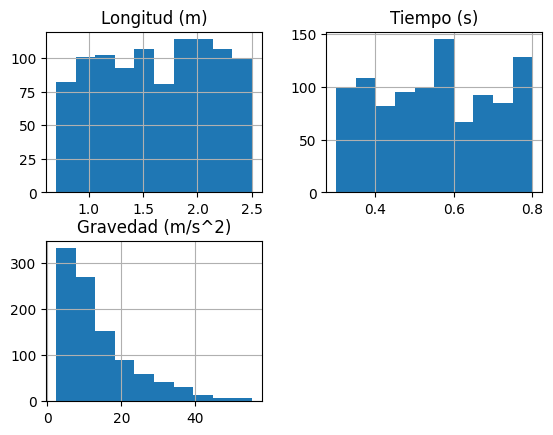

In [165]:
# histogramas
df.hist(column=['Longitud (m)', 'Tiempo (s)', 'Gravedad (m/s^2)'])
plt.show()

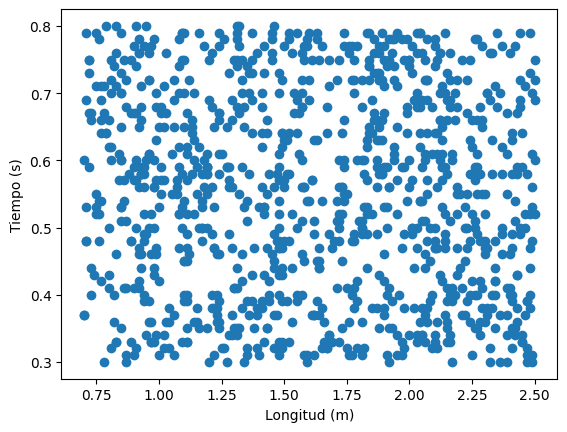

In [166]:
# grafico de dispersion
plt.scatter(df['Longitud (m)'], df['Tiempo (s)'])
plt.xlabel('Longitud (m)')
plt.ylabel('Tiempo (s)')
plt.show()

In [167]:
# codificar etiquetas de planetas 
codificador_etiquetas = LabelEncoder()
df['Planeta más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['Planeta más cercano'])
df['2ndo más cercano (codigo)'] = codificador_etiquetas.fit_transform(df['2ndo más cercano'])

In [168]:
# correlación entre variables 
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric.corr())


                              Longitud (m)  Tiempo (s)  Gravedad (m/s^2)   
Longitud (m)                      1.000000   -0.060761          0.488029  \
Tiempo (s)                       -0.060761    1.000000         -0.800437   
Gravedad (m/s^2)                  0.488029   -0.800437          1.000000   
Error en porcentaje (%)           0.016090   -0.965572          0.836947   
Error Gravedad (m/s^2)            0.356814   -0.806041          0.984175   
Planeta más cercano (codigo)     -0.053393    0.462780         -0.539667   
2ndo más cercano (codigo)        -0.401244    0.576814         -0.633982   

                              Error en porcentaje (%)  Error Gravedad (m/s^2)   
Longitud (m)                                 0.016090                0.356814  \
Tiempo (s)                                  -0.965572               -0.806041   
Gravedad (m/s^2)                             0.836947                0.984175   
Error en porcentaje (%)                      1.000000              

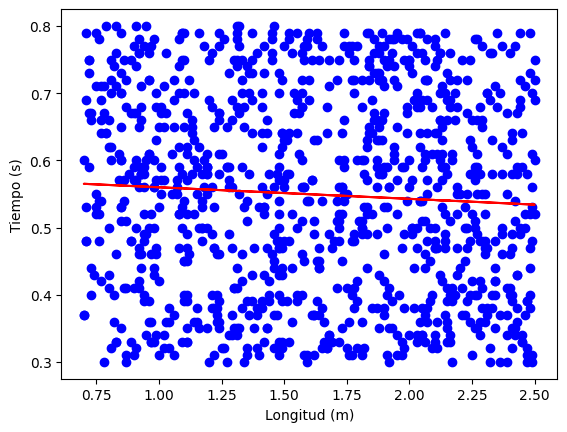

In [169]:
# regresion lineal 
X = df['Longitud (m)'].values.reshape(-1, 1)
y = df['Tiempo (s)'].values.reshape(-1, 1)
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y)

y_pred = regresion_lineal.predict(X)
plt.scatter(X, y, color='blue') 
plt.plot(X, y_pred, color='red')
plt.xlabel('Longitud (m)')
plt.ylabel('Tiempo (s)')
plt.show()

In [182]:


def calcular_error(L, t):
    L_simbolo, t_simbolo = sp.symbols('L t')
    g_calculada_simbolo = (2*L_simbolo) / (t_simbolo**2)
    
    derivada_parcial_L = sp.diff(g_calculada_simbolo, L_simbolo)
    derivada_parcial_t = sp.diff(g_calculada_simbolo, t_simbolo)
    
    error_L = 0.01
    error_t = 0.01
    
    error_g_calculada = sp.sqrt((derivada_parcial_L * error_L)**2 + (derivada_parcial_t * error_t)**2)
    
    return float(error_g_calculada.subs({L_simbolo: L, t_simbolo: t}))

def generar_datos_cercanos_a_resultados(planetas, L_objetivo, t_objetivo):
    L = round(rd.uniform(L_objetivo - 0.1, L_objetivo + 0.1), 2)
    t = round(rd.uniform(t_objetivo - 0.1, t_objetivo + 0.1), 2)
    
    g_calculada = round((2*L) / (t**2), 2)
    
    diferencia_minima = float('inf')
    planeta_mas_cercano = ''
    
    for planeta, gravedad in planetas.items():
        diferencia = abs(gravedad - g_calculada)
        if diferencia < diferencia_minima:
            diferencia_minima = diferencia
            planeta_mas_cercano = planeta
    
    diferencia_minima_2 = float('inf')
    segundo_planeta_mas_cercano = ''
    
    for planeta, gravedad in planetas.items():
        if planeta != planeta_mas_cercano:
            diferencia = abs(gravedad - g_calculada)
            if diferencia < diferencia_minima_2:
                diferencia_minima_2 = diferencia
                segundo_planeta_mas_cercano = planeta
    
    error_g_calculada = calcular_error(L, t)
    
    error_porcentaje = (error_g_calculada / g_calculada) * 100
    
    return {
        'Id': fake.uuid4(),
        'Longitud (m)': L,
        'Tiempo (s)': t,
        'Gravedad (m/s^2)': g_calculada,
        'Planeta más cercano': planeta_mas_cercano,
        'Segundo Planeta más cercano': segundo_planeta_mas_cercano,
        'Error Gravedad (m/s^2)': error_g_calculada,
        'Error Porcentaje (%)': error_porcentaje
    }

L1_objetivo = 1.00
t1_objetivo = 0.46

dataframe_a = pd.DataFrame([generar_datos_cercanos_a_resultados(planetas, L1_objetivo, t1_objetivo) for _ in range(1000)])
dataframe_a

L2_objetivo = 2.00
t2_objetivo = 0.66

dataframe_b = pd.DataFrame([generar_datos_cercanos_a_resultados(planetas, L2_objetivo, t2_objetivo) for _ in range(1000)])
dataframe_b

,Id,Longitud (m),Tiempo (s),Gravedad (m/s^2),Planeta más cercano,Segundo Planeta más cercano,Error Gravedad (m/s^2),Error Porcentaje (%)
0,3475cf93-ea07-4f83-88d2-588610b7a836,1.94,0.58,11.53,Neptuno,Tierra,0.402139,3.487766
1,2fd108e0-017f-4484-8a7b-46e67b51ea63,1.91,0.58,11.36,Neptuno,Tierra,0.396058,3.486423
2,b7dde541-d6f4-41b9-b28b-5c85f2a95c86,1.94,0.66,8.91,Saturno,Urano,0.273794,3.072884
3,aa9e3e80-bd8e-4cea-a61c-7fd0c9c5d76a,2.07,0.72,7.99,Urano,Saturno,0.225166,2.818101
4,94402c30-b167-405c-ab9d-74093348ea52,1.99,0.62,10.35,Tierra,Neptuno,0.338022,3.265910
...,...,...,...,...,...,...,...,...
995,61b91c27-6cb1-43e7-abc1-688234554d0e,2.03,0.64,9.91,Tierra,Saturno,0.313578,3.164262
996,900a9058-75fa-4ec3-bba6-0d59cc85b62e,1.97,0.66,9.04,Saturno,Urano,0.277910,3.074223
997,e44a1337-cbb4-40e5-b6b5-2e30e6bfa27d,1.92,0.67,8.55,Urano,Saturno,0.259208,3.031675
998,838ff478-a61d-459e-be42-db2c624097c5,1.92,0.60,10.67,Neptuno,Tierra,0.359870,3.372724


In [186]:
def contar_planetas(dataframe):
    conteo_planetas = dataframe_a['Planeta más cercano'].value_counts()
    
    planeta_mas_cercana_nave = conteo_planetas.idxmax()
    
    conteo_planetas_2 = dataframe_a['Segundo Planeta más cercano'].value_counts()
    
    segundo_planeta_mas_cercana_nave = conteo_planetas_2.idxmax()
    
    return conteo_planetas, planeta_mas_cercana_nave, conteo_planetas_2, segundo_planeta_mas_cercana_nave


conteo_planetas, planeta_mas_cercana_nave, conteo_planetas_2, segundo_planeta_mas_cercana_nave = contar_planetas(dataframe)

print(conteo_planetas)
print(f'El planeta más cercano a la nave es: {planeta_mas_cercana_nave}')
print(f'El segundo planeta más cercano a la nave es: {segundo_planeta_mas_cercana_nave}')

Planeta más cercano
Urano      419
Neptuno    376
Tierra     110
Saturno     73
Marte       22
Name: count, dtype: int64
El planeta más cercano a la nave es: Urano
El segundo planeta más cercano a la nave es: Saturno


In [185]:
def contar_planetas(dataframe):
    conteo_planetas = dataframe_b['Planeta más cercano'].value_counts()
    
    planeta_mas_cercana_nave = conteo_planetas.idxmax()
    
    conteo_planetas_2 = dataframe_b['Segundo Planeta más cercano'].value_counts()
    
    segundo_planeta_mas_cercana_nave = conteo_planetas_2.idxmax()
    
    return conteo_planetas, planeta_mas_cercana_nave, conteo_planetas_2, segundo_planeta_mas_cercana_nave


conteo_planetas, planeta_mas_cercana_nave, conteo_planetas_2, segundo_planeta_mas_cercana_nave = contar_planetas(dataframe)

print(conteo_planetas)
print(f'El planeta más cercano a la nave es: {planeta_mas_cercana_nave}')
print(f'El segundo planeta más cercano a la nave es: {segundo_planeta_mas_cercana_nave}')

Planeta más cercano
Urano      427
Neptuno    330
Tierra     127
Saturno    116
Name: count, dtype: int64
El planeta más cercano a la nave es: Urano
El segundo planeta más cercano a la nave es: Saturno
